<a href="https://colab.research.google.com/github/CervantesMCinthiaK/Metodos-Numericos/blob/main/Polinomio%20Interpolante%20de%20Newton%20con%20Sympy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Polinomio Interpolante de Newton con Sympy
Cervantes Martinez Cinthia Karina


In [76]:
#Importamos las librerias que usaremos
import matplotlib.pyplot as plt
from sympy import symbols, expand

In [77]:
# Funcion para calcular las diferencias divididas ojo si es posible simplificada.
def diferencias_divididas(x_vals, f_vals):
    n = len(x_vals)
    # Diferencias divididas, inicia con los valores de f(x)
    diff_table = [f_vals]

    # Calcular las diferencias divididas
    for j in range(1, n):
        diffs = []
        for i in range(n-j):
            # Formula de las diferencias divididas
            diff = (diff_table[j-1][i+1] - diff_table[j-1][i]) / (x_vals[i+j] - x_vals[i])
            diffs.append(diff)
        diff_table.append(diffs)

    return diff_table

In [78]:
# Funcion para construir el polinomio de Newton a partir de las diferencias divididas
def polinomio_newton(x_vals, diff_table, x):
    n = len(x_vals)
    polinomio = diff_table[0][0]  # Primer valor de la tabla de diferencias
    term = 1  # Producto de (x - x_i)

    # Imprime el procedimiento
    print("\nProcedimiento de construccion del Polinomio de Newton:")
    print("Polinomio de Newton P(x) = ", end="")

    # Construccion del polinomio de Newton
    for i in range(1, n):
        term *= (x - x_vals[i-1])
        polinomio += term * diff_table[i][0]
        # Imprimir el termino añadido
        print(f"{term} * {diff_table[i][0]:.2f}", end="")
        if i < n - 1:
            print(" + ", end="")
    print("\n")

    return polinomio


In [79]:
# Funcion para graficar el polinomio y los puntos de la tabla
def graficar_polinomio(x_vals, f_vals, polinomio_func):
    # Crear una malla de x para graficar el polinomio de Newton suavemente
    x_vals_denso = [x / 100 for x in range(int(min(x_vals) * 100), int(max(x_vals) * 100))]
    y_vals_denso = [polinomio_func(x) for x in x_vals_denso]

    # Graficar los puntos de la tabla (x_i, f(x_i))
    plt.scatter(x_vals, f_vals, color="magenta", marker="o", label="Datos Originales")

    # Graficar el polinomio de Newton en color azul
    plt.plot(x_vals_denso, y_vals_denso, color="blue", label="Polinomio Interpolante")

    # Añadir los valores de cada punto (x_i, f(x_i)) en la gráfica
    for i, (x, y) in enumerate(zip(x_vals, f_vals)):
        # Colocar el texto cerca de cada punto
        plt.text(x, y, f"({x:.2f}, {y:.2f})", fontsize=9, ha="right", color="black")

    # Configurar el titulo, etiquetas y leyenda
    plt.title("Grafico del Polinomio Interpolante con los Datos Originales")
    plt.xlabel("x", fontsize=8, color="gray")
    plt.ylabel("f(x)", fontsize=8, color="gray")
    plt.axhline(0, color="gray")
    plt.axvline(0, color="gray")
    plt.grid(True)
    plt.legend()
    plt.savefig("output.png") # Guardar grafico como imagen PNG
    plt.show()

In [80]:
# Funcion para imprimir la tabla de diferencias divididas
def imprimir_tabla_diferencias(x_vals, diff_table):
    print("\nTabla de Diferencias Divididas:")
    # Imprimir encabezados
    encabezado = ["x", "f(x)"]
    for i in range(1, len(diff_table)):
        encabezado.append(f"Δy^{i}")

    print("   ".join(encabezado))  # Imprimir encabezado de la tabla

    # Imprimir filas
    for i in range(len(diff_table[0])):
        fila = [f"{x_vals[i]:.2f}", f"{diff_table[0][i]:.2f}"]
        for j in range(1, len(diff_table)):
            if i < len(diff_table[j]):
                fila.append(f"{diff_table[j][i]:.2f}")
            else:
                fila.append("    ")  # Espacio vacio cuando no hay valores en esa celda
        print("   ".join(fila))

¿Cuantos puntos de datos tiene la tabla? 6
Ingrese el valor de x_1: 0
Ingrese el valor de f(x_1): -5
Ingrese el valor de x_2: 1
Ingrese el valor de f(x_2): 1
Ingrese el valor de x_3: 2
Ingrese el valor de f(x_3): 9
Ingrese el valor de x_4: 3
Ingrese el valor de f(x_4): 25
Ingrese el valor de x_5: 4
Ingrese el valor de f(x_5): 55
Ingrese el valor de x_6: 5
Ingrese el valor de f(x_6): 105

Tabla de Diferencias Divididas:
x   f(x)   Δy^1   Δy^2   Δy^3   Δy^4   Δy^5
0.00   -5.00   6.00   1.00   1.00   0.00   0.00
1.00   1.00   8.00   4.00   1.00   0.00       
2.00   9.00   16.00   7.00   1.00              
3.00   25.00   30.00   10.00                     
4.00   55.00   50.00                            
5.00   105.00                                   

Procedimiento de construccion del Polinomio de Newton:
Polinomio de Newton P(x) = x * 6.00 + x*(x - 1.0) * 1.00 + x*(x - 2.0)*(x - 1.0) * 1.00 + x*(x - 3.0)*(x - 2.0)*(x - 1.0) * 0.00 + x*(x - 4.0)*(x - 3.0)*(x - 2.0)*(x - 1.0) * 0.00


Por 

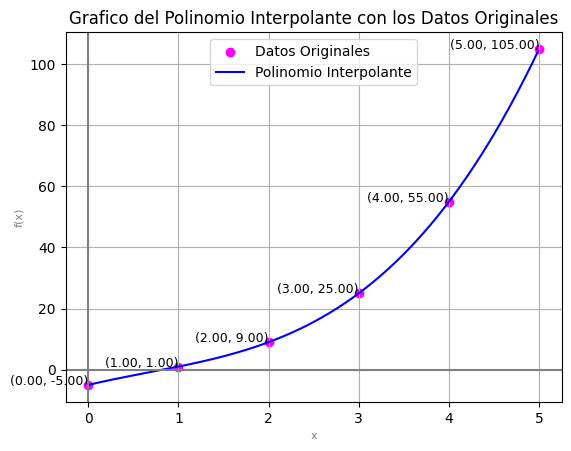

In [81]:
# Funcion principal para obtener el polinomio de interpolacion de Newton
def main():
    # Ingresar los puntos (x_i, f(x_i))
    n = int(input("¿Cuantos puntos de datos tiene la tabla? "))

    x_vals = []
    f_vals = []

    for i in range(n):
        x_i = float(input(f"Ingrese el valor de x_{i+1}: "))
        f_i = float(input(f"Ingrese el valor de f(x_{i+1}): "))
        x_vals.append(x_i)
        f_vals.append(f_i)

    # Calcular las diferencias divididas
    diff_table = diferencias_divididas(x_vals, f_vals)

    # Imprimir la tabla de diferencias divididas
    imprimir_tabla_diferencias(x_vals, diff_table)

    # Crear el polinomio de Newton
    x = symbols('x')
    polinomio = polinomio_newton(x_vals, diff_table, x)

    # Expansion del polinomio
    polinomio_expandido = expand(polinomio)
    print("\nPor lo tanto, el polinomio de interpolacion de Newton es:\n ")
    print(f"{polinomio_expandido}")
    print("")
    print("\ncon su respectiva grafica: \n")
    # Graficamos el polinomio con los puntos originales
    graficar_polinomio(x_vals, f_vals, lambda x_val: polinomio.subs(x, x_val))

# Ejecutamos el programa
if __name__ == "__main__":
    main()

En este codigo ahora ingresamos la tabla de valores y nos da el polinomio junto con su grafica :

$$
\begin{array}{|c|c|}
\hline
x & f(x) \\
\hline
0.0 & -5.00 \\
1.0 & 1.00 \\
2.0 & 9.00 \\
3.0 & 25.00 \\
4.0 & 55.00 \\
5.0 & 105.00 \\
\hline
\end{array}
$$